# Support Vector Machine(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df.shape

(2000, 26)

In [4]:
df.head(5)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


## Dropping unnecessary columns

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df.shape

(2000, 25)

## Checking for duplicates

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996    False
1997     True
1998     True
1999    False
Length: 2000, dtype: bool

In [11]:
df.loc[df.duplicated()] # Returns duplicated cell

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [12]:
df = df.drop_duplicates()
df.shape

(976, 25)

## Checking for NULL values

In [13]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

NO NULL values

## Encoding the dataset

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.dtypes

cap_shape                     int32
cap_surface                   int32
cap_color                     int32
bruises                       int32
odor                          int32
gill_attachment               int32
gill_spacing                  int32
gill_size                     int32
gill_color                    int32
stalk_shape                   int32
stalk_root                    int32
stalk_surface_above_ring      int32
stalk_surface_below_ring      int32
stalk_color_above_ring        int32
stalk_color_below_ring        int32
veil_type                     int32
veil_color                    int32
ring_number                   int32
ring_type                     int32
spore_print_color             int32
population                    int32
habitat                       int32
class                         int32
stalk_height                float64
cap_diameter                float64
dtype: object

## Visualizing the features

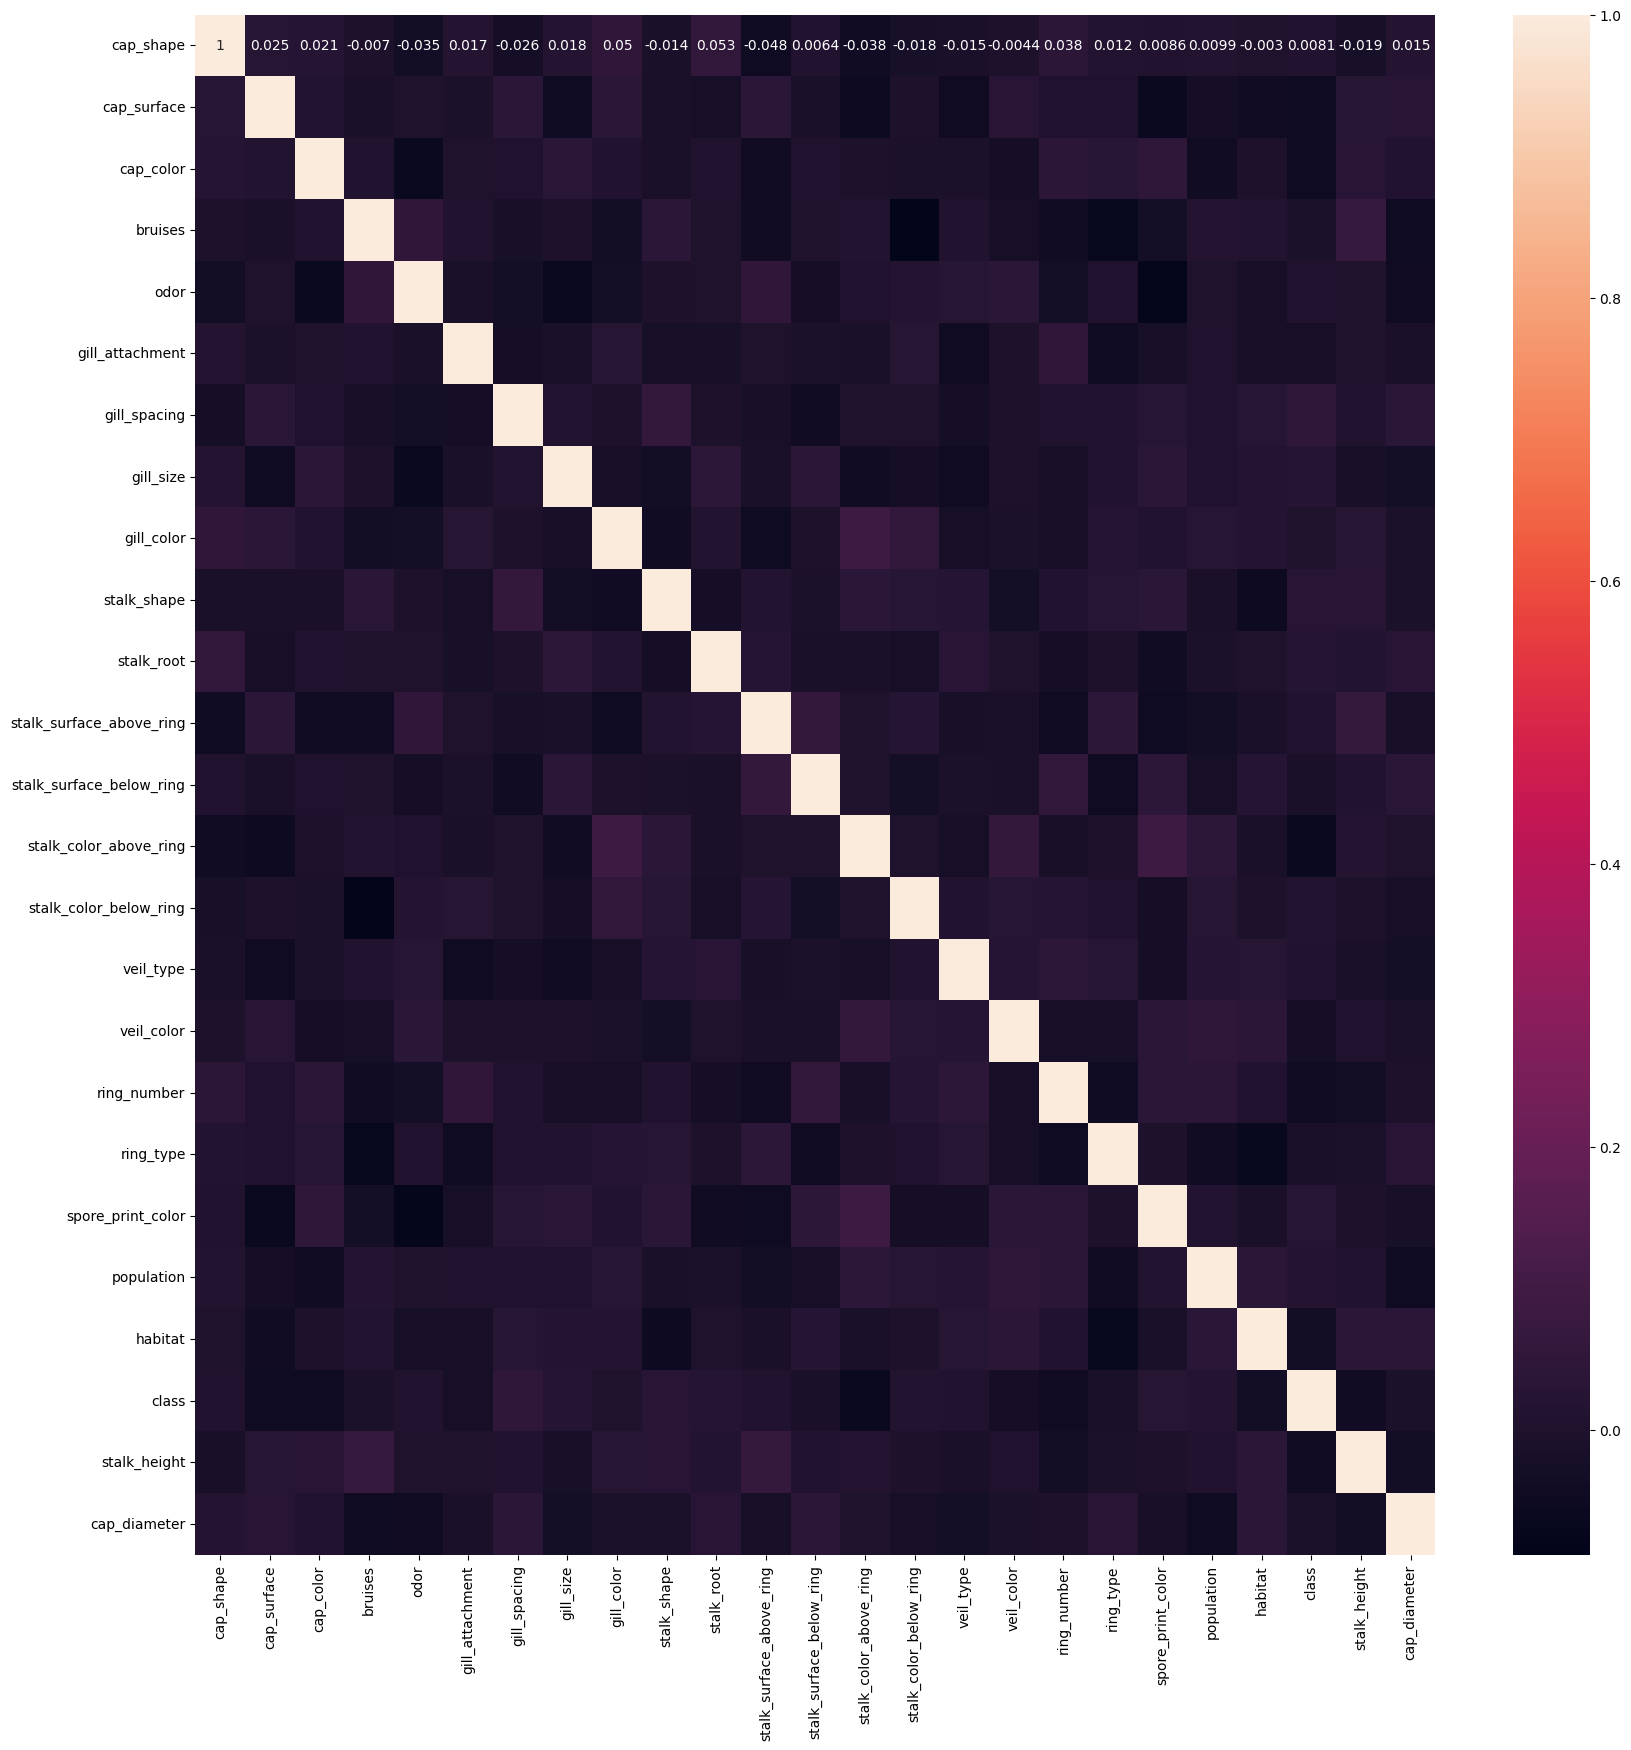

In [15]:
# Finding correlation between features
correlation = df[df.columns].corr()

plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True)
plt.show()

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['class']) # Features
y = df['class'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardizing the dataset

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Build the model

In [18]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train_scaled, y_train)

SVC()

In [19]:
y_pred = clf.predict(X_test_scaled)

## Evaluate the model

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy score =\n', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix =\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy score =
 0.6275510204081632

Confusion Matrix =
 [[  1  71]
 [  2 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.63      0.98      0.77       124

    accuracy                           0.63       196
   macro avg       0.48      0.50      0.40       196
weighted avg       0.52      0.63      0.50       196



## Hyperparameter Tuning

### Using Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [21]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [24]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

## Evaluate the Best Model

In [25]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.6333333333333333

Test Accuracy: 0.6326530612244898

Confusion Matrix:
 [[  0  72]
 [  0 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Comparing SVM performance with various kernels (e.g., linear, polynomial, radial basis function)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    print(f"\nTraining SVM with kernel = '{kernel}'")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    models[kernel] = {
        'model': model,
        'accuracy': acc,
        'y_pred': y_pred
    }



Training SVM with kernel = 'linear'
Accuracy: 0.6327
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196


Training SVM with kernel = 'poly'
Accuracy: 0.6378
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.07      0.12        72
           1       0.64      0.97      0.77       124

    accuracy                           0.64       196
   macro avg       0.60      0.52      0.45       196
weighted avg       0.61      0.64      0.53       196


Training SVM with kernel = 'rbf'


C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.6276
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.63      0.98      0.77       124

    accuracy                           0.63       196
   macro avg       0.48      0.50      0.40       196
weighted avg       0.52      0.63      0.50       196



## Visualize SVM Results

### Apply PCA to Reduce to 2D

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce X_test_scaled to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

### Predict with SVM

In [32]:
# Assume you're using the best trained model (e.g., linear kernel)
best_svm_model = models['linear']['model']
y_pred = best_svm_model.predict(X_test_scaled)

### Scatter Plot of Test Data

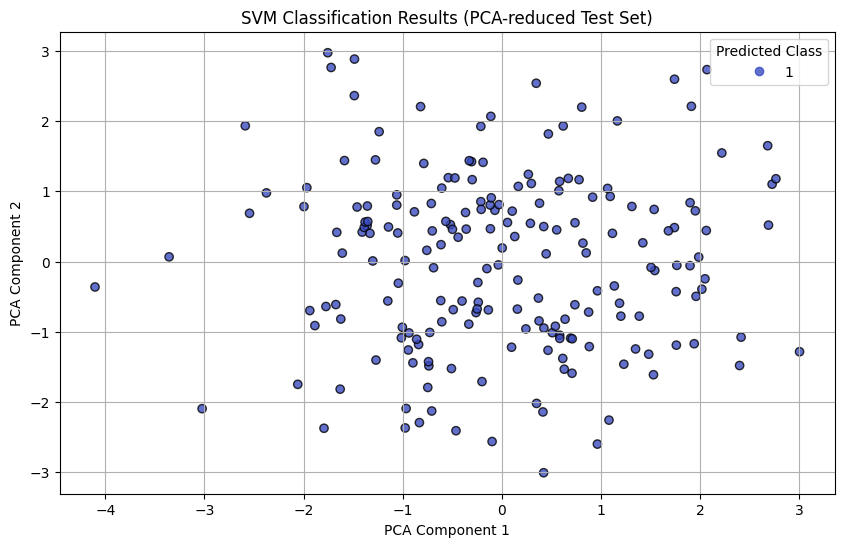

In [33]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1],
    c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.8
)

plt.title("SVM Classification Results (PCA-reduced Test Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Predicted Class")
plt.show()

## Strengths and weaknesses of SVM

Strengths:

1. Excellent accuracy

2. Robust to overfitting (with regularization)

3. Handles non-linear data (with kernels)

Weaknesses:

1. No native categorical handling

2. Can overfit if not tuned properly

3. Sensitive to feature scaling

## Practical implications of SVM in real-world classification tasks.

1. High Performance in Well-Structured, Separable Data

2. Effective with Small-to-Medium Datasets

3. Use of different Kernels Enables Non-Linear Classification